# Stage 1 - Data Pre-Processing

Team : Bli Buka Toko PeeZa
1. Timothy Varian
2. Ghaisani Anindya Ayuningtyas
3. Desy Damayanti
4. Elistia
5. Muhammad Triono

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')


**E-Commerce Shipping Classification**<br>
**Deskripsi**<br>
Memprediksi apakah pengiriman produk di perusahaannya dikirimkan tepat waktu atau tidak berdasarkan data internal perusahaan<br>

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
from textwrap import wrap
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.19.2
pandas version :  1.1.3
seaborn version :  0.11.0


In [4]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Load and Describe Data

## Load Data

In [8]:
data = pd.read_csv('commerce.csv')
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [14]:
data.sample(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
1464,1465,D,Ship,3,2,226,3,low,M,11,3708,1
5879,5880,F,Road,3,3,244,3,low,M,6,5109,0
3734,3735,A,Ship,4,5,185,3,low,F,2,4336,1
3226,3227,C,Ship,4,2,271,3,medium,M,4,4743,1
4357,4358,F,Road,5,1,201,3,low,M,4,5166,1
5754,5755,D,Flight,6,4,305,4,low,F,7,1172,1
5818,5819,C,Ship,5,5,273,4,low,M,7,4064,1
3224,3225,A,Ship,3,4,117,3,low,F,6,4046,0
3935,3936,F,Ship,3,1,139,2,medium,M,3,4226,0
3246,3247,D,Ship,4,1,189,3,medium,M,5,4496,1


## Describe Data

In [15]:
data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [16]:
data.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [17]:
data.duplicated().sum()

0

Berdasarkan data diatas dapat diketahui bahwa :<br>
1. Jumlah data Product_Exclusive_Classification sebanyak : 10.999 barisdata dan 12 feature yang meliputi informasi:<br>
    a. ID: ID Number of Customers.<br>
    b. Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.<br>
    c. Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.<br>
    d. Customer care calls: The number of calls made from enquiry for enquiry of the shipment.<br>
    e. Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).<br>
    f. Cost of the product: Cost of the Product in US Dollars.<br>
    g. Prior purchases: The Number of Prior Purchase.<br>
    h. Product importance: The company has categorized the product in the various parameter such as low, medium, high.<br>
    i. Gender: Male and Female.<br>
    j. Discount offered: Discount offered on that specific product.<br>
    k. Weight in gms: It is the weight in grams.<br>
    l. Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.<br>
2. Tidak ditemukan data kosong<br>
3. Tidak ditemukan data duplikat pada data Product_Exclusive_Classification <br>
4. Perlu penyesuaian Data Type untuk feature Reached.on.Time_Y.N dari integer menjadi object <br>

# Exploratory Data Analysis (EDA)

## Pendekatan Numerik

In [14]:
nums = ['ID','Customer_care_calls','Customer_rating','Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms','Reached.on.Time_Y.N']
cats =['Warehouse_block','Mode_of_Shipment', 'Product_importance', 'Gender']

In [15]:
data[nums].describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [16]:
data[cats].describe()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


In [14]:
data['Warehouse_block'].value_counts()

F    3666
D    1834
B    1833
C    1833
A    1833
Name: Warehouse_block, dtype: int64

Target : Memprediksi apakah suatu produk terkirim ontime atau tidak

In [15]:
data['Reached.on.Time_Y.N'].value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

In [17]:
data['Reached.on.Time_Y.N'].unique()

array([1, 0], dtype=int64)

###### Pendekatan Numerik
Berdasarkan data di atas diketahui bahwa : <br>
1. Terlihat perbandingan mean dan median, maka dugaan bentuk distribusi dari tipe data numerik di atas termasuk distribusi normal <br>
2. Top Warehouse_block pada block F, Top Mode_of_Shipment adalah Ship, Top Product_importance yaitu low dan Top Gender : Female <br>
3. Pada deskripsi data Warehouse_block terdiri dari 5 data unik yaitu A, B, C, D, dan E pada data tidak ditemukan value E tetapi "F" <br>
4. Nilai unik dari Reached.on.Time_Y.N berisi 0 dan 1, lebih baik menggunakan Yes dan No <br>
5. Jumlah Reached.on.Time_Y.N yang terlambat (1) berjumlah 6563 menunjukan bahwa 

## Pendekatan Grafis

### Univariate Analysis

In [18]:
numeric = ['Cost_of_the_Product','Discount_offered','Weight_in_gms']

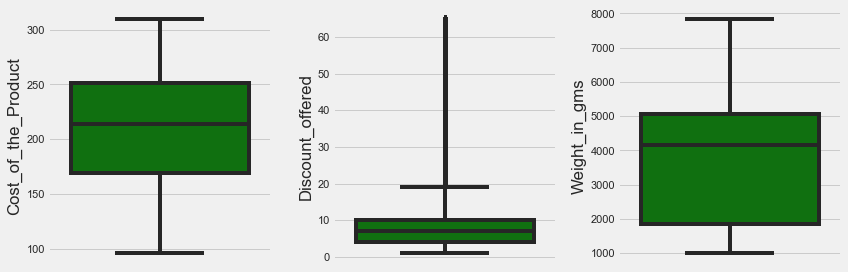

In [19]:
plt.figure(figsize=(12, 4))
for i in range(0, len(numeric)):
    plt.subplot(1, len(numeric), i+1)
    sns.boxplot(y=data[numeric[i]], color='green', orient='v')
    plt.tight_layout()

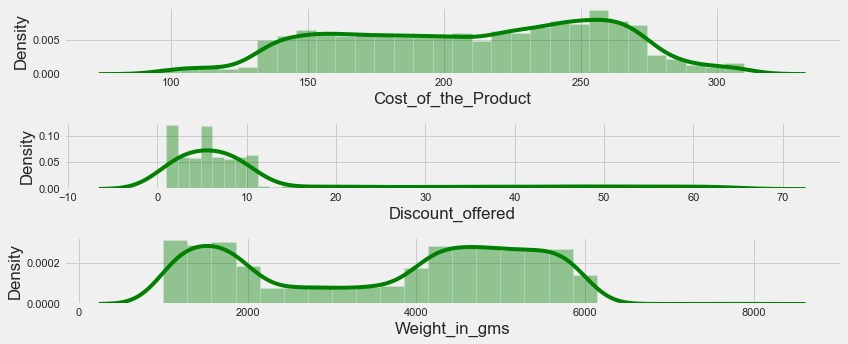

In [21]:
plt.figure(figsize=(12, 5))
for i in range(0, len(numeric)):
    plt.subplot(3, len(numeric)/2, i+1)
    sns.distplot(data[numeric[i]], color='green')
    plt.tight_layout()

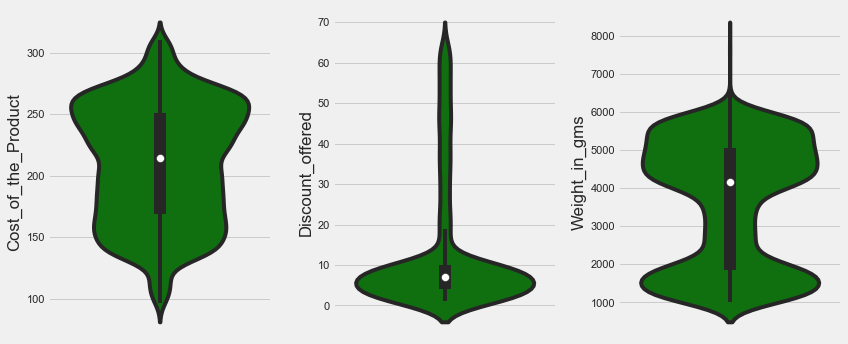

In [22]:
plt.figure(figsize=(12, 5))
for i in range(0, len(numeric)):
    plt.subplot(1, len(numeric), i+1)
    sns.violinplot(y=data[numeric[i]], color='green', orient='v')
    plt.tight_layout()

###### Univariate Analysis dari grafik diatas adalah:<br>
1. 

### Multivariate Analysis

<Figure size 864x2160 with 0 Axes>

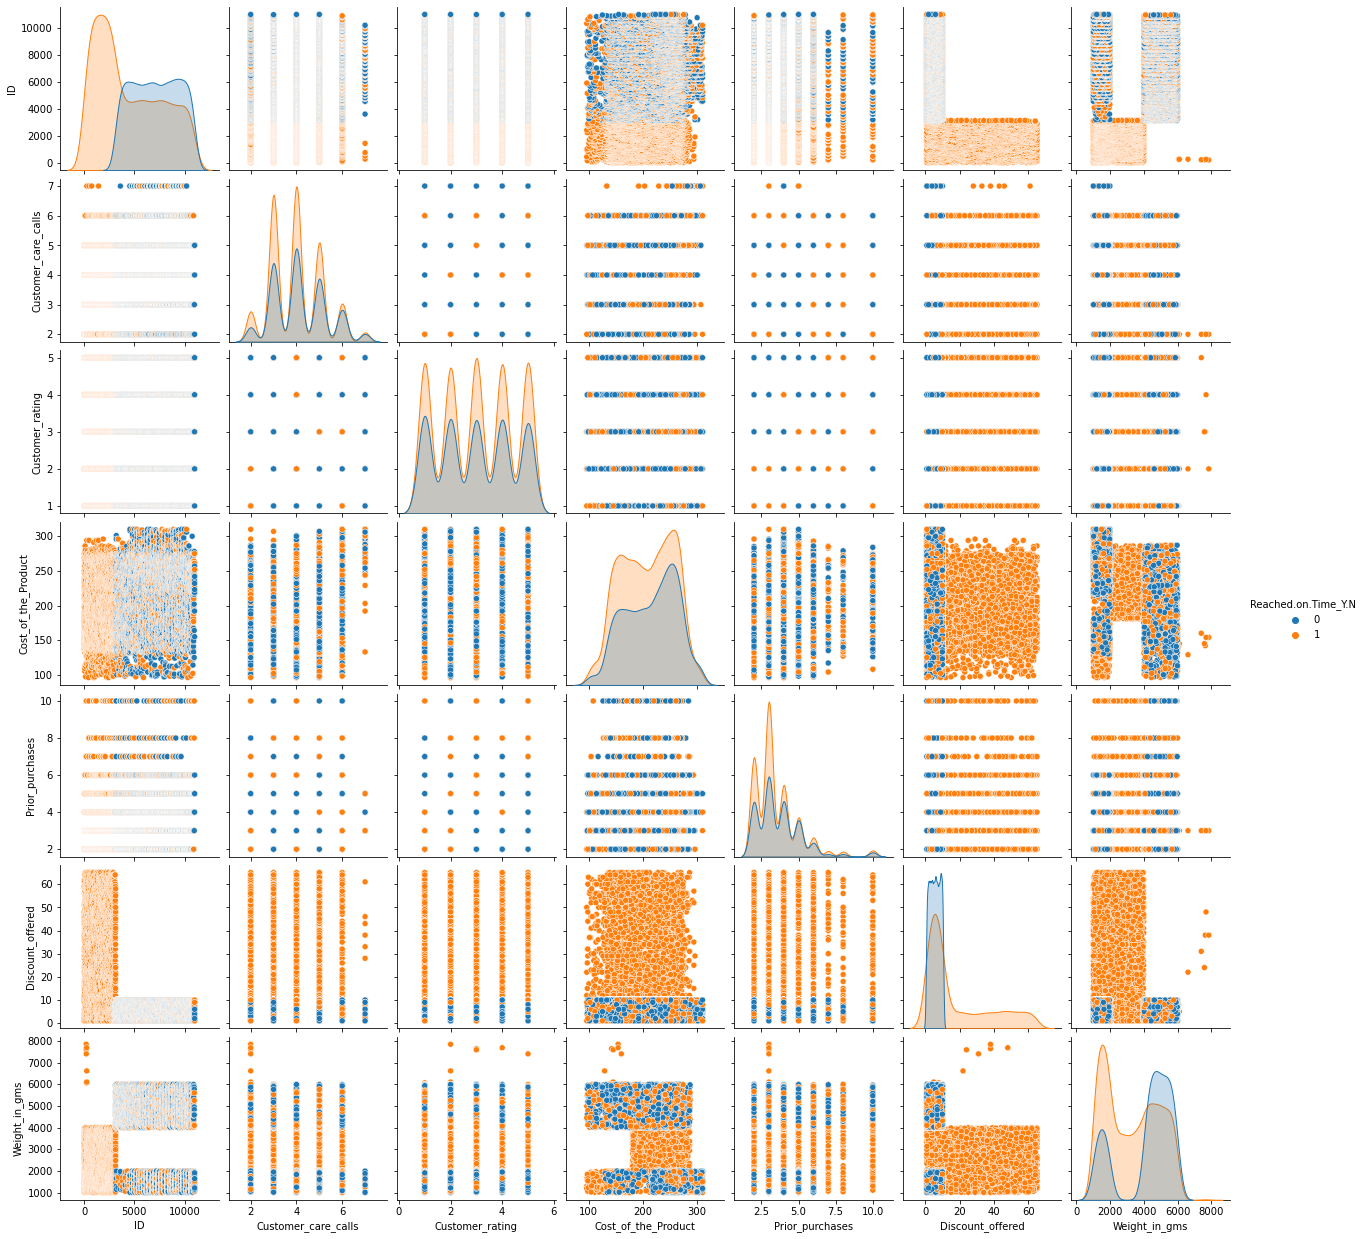

In [24]:
plt.figure(figsize=(12, 30))
sns.pairplot(data, hue='Reached.on.Time_Y.N')

<AxesSubplot:>

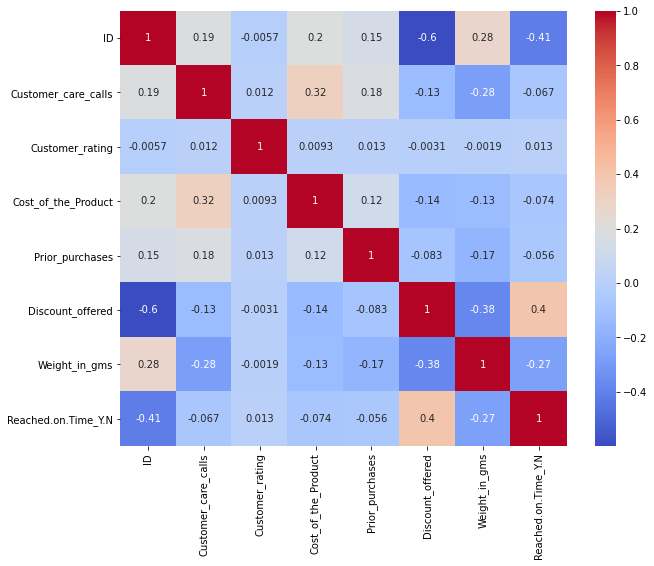

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [26]:
data.groupby(by=['Reached.on.Time_Y.N']).sum()  

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
Reached.on.Time_Y.N,,,,,,,
0,31453367,18399,13166,951516,16282,24602,18492213
1,29041133,26196,19727,1360439,22958,122490,21478337


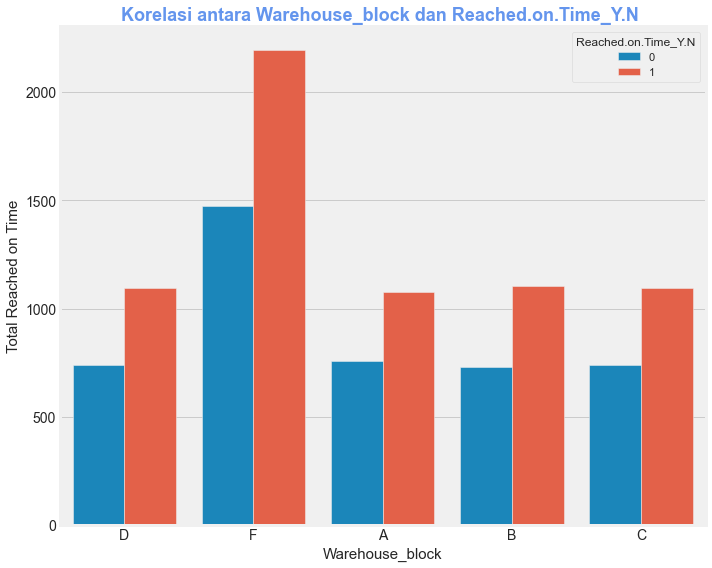

In [85]:
#Mengetahui apakah warehouse block berpengaruh terhadap Reached.on.Time_Y.N
plt.figure(figsize=(10,8))
sns.countplot(x='Warehouse_block', hue='Reached.on.Time_Y.N', data=data)

plt.title('Korelasi antara Warehouse_block dan Reached.on.Time_Y.N ',color='cornflowerblue',fontsize=18,fontweight='bold')
plt.ylabel('Total Reached on Time', fontsize=15) # y axis label
plt.xlabel('Warehouse_block', fontsize=15) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14);

plt.tight_layout()

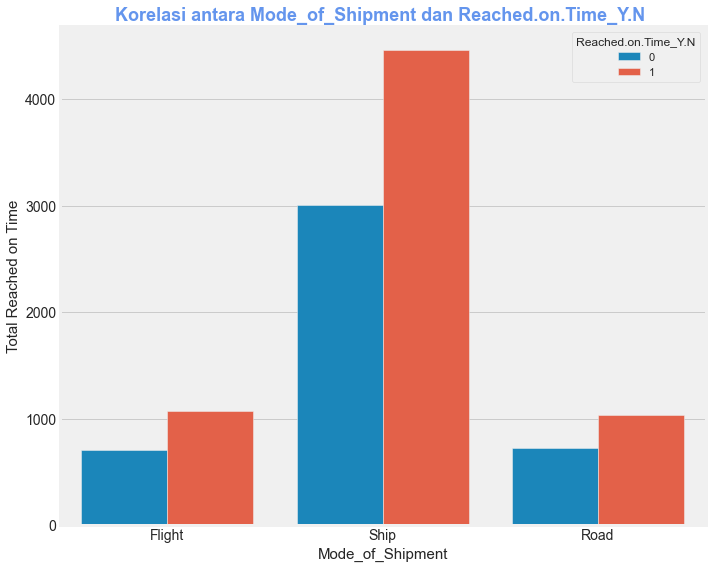

In [86]:
#Mengetahui apakah Mode Of Shipment berpengaruh terhadap Reached.on.Time_Y.N
plt.figure(figsize=(10,8))
sns.countplot(x='Mode_of_Shipment', hue='Reached.on.Time_Y.N', data=data)

plt.title('Korelasi antara Mode_of_Shipment dan Reached.on.Time_Y.N ',color='cornflowerblue',fontsize=18,fontweight='bold')
plt.ylabel('Total Reached on Time', fontsize=15) # y axis label
plt.xlabel('Mode_of_Shipment', fontsize=15) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14);

plt.tight_layout()

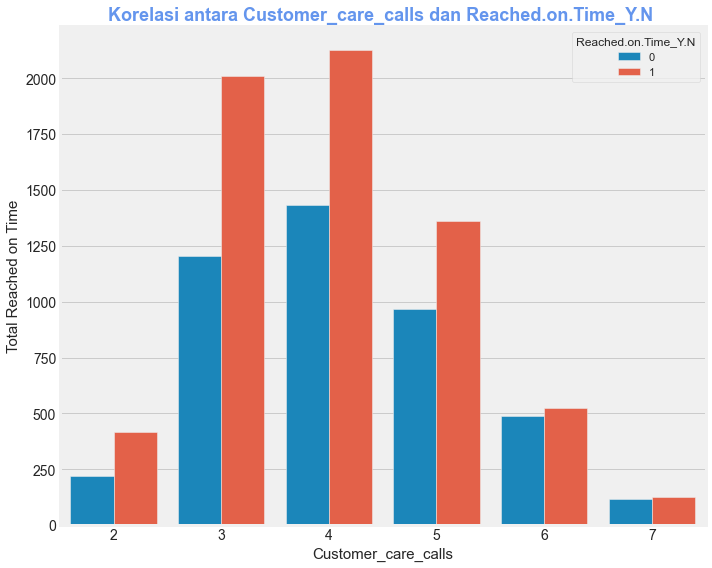

In [87]:
#Mengetahui hubungan/korelasi Customer_care_calls berpengaruh terhadap Reached.on.Time_Y.N
plt.figure(figsize=(10,8))
sns.countplot(x='Customer_care_calls', hue='Reached.on.Time_Y.N', data=data)

plt.title('Korelasi antara Customer_care_calls dan Reached.on.Time_Y.N ',color='cornflowerblue',fontsize=18,fontweight='bold')
plt.ylabel('Total Reached on Time', fontsize=15) # y axis label
plt.xlabel('Customer_care_calls', fontsize=15) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14);

plt.tight_layout()

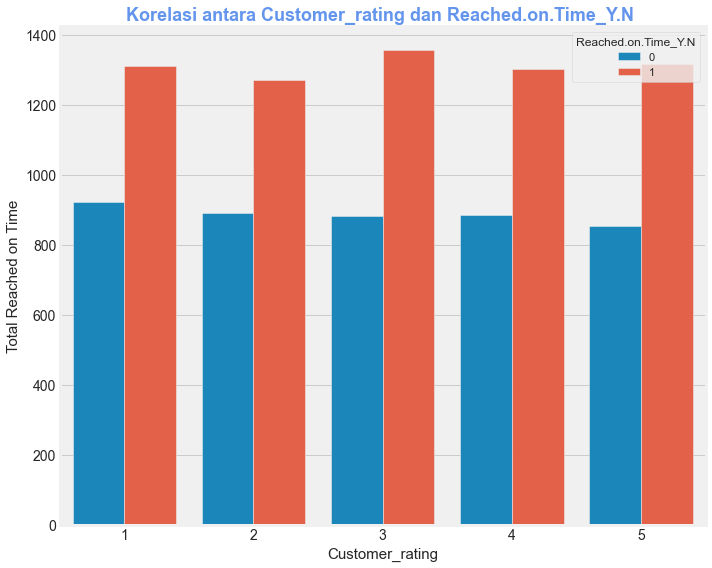

In [88]:
#Mengetahui hubungan/korelasi Customer_rating berpengaruh terhadap Reached.on.Time_Y.N
plt.figure(figsize=(10,8))
sns.countplot(x='Customer_rating', hue='Reached.on.Time_Y.N', data=data)

plt.title('Korelasi antara Customer_rating dan Reached.on.Time_Y.N ',color='cornflowerblue',fontsize=18,fontweight='bold')
plt.ylabel('Total Reached on Time', fontsize=15) # y axis label
plt.xlabel('Customer_rating', fontsize=15) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14);

plt.tight_layout()

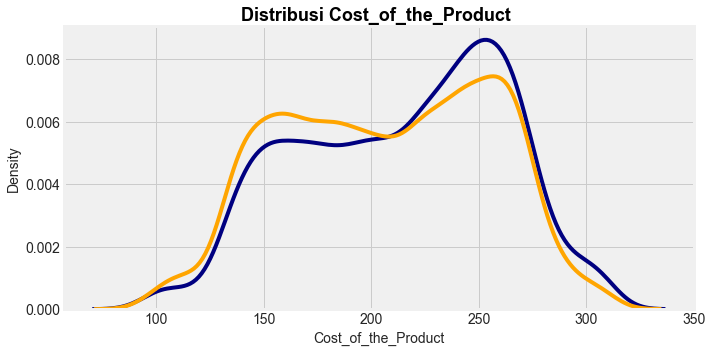

In [94]:
#mengetahui distirbusi cost of the product
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(data[data['Reached.on.Time_Y.N'] == 0]['Cost_of_the_Product'], color= 'navy', label= 'Late: No', ax=ax)
sns.kdeplot(data[data['Reached.on.Time_Y.N'] == 1]['Cost_of_the_Product'], color= 'orange', label= 'Late: Yes', ax=ax)

ax.set_title('Distribusi Cost_of_the_Product ',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Cost_of_the_Product', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tight_layout()

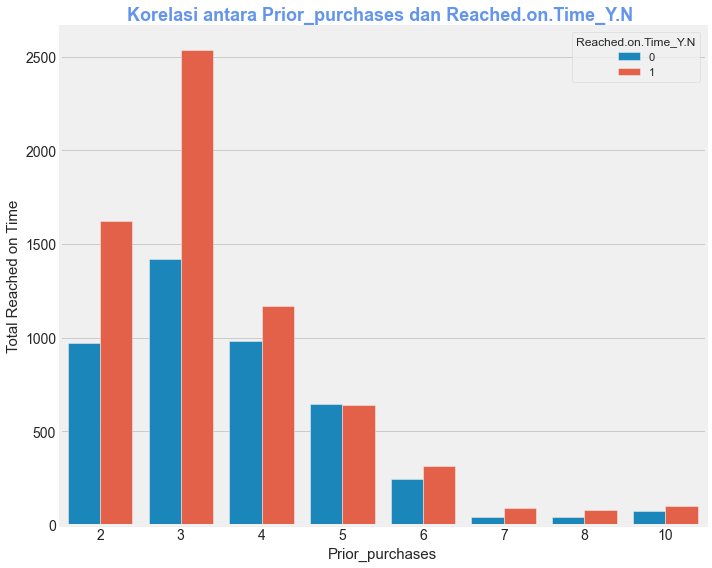

In [93]:
#Mengetahui hubungan/korelasi prior purchase berpengaruh terhadap Reached.on.Time_Y.N
plt.figure(figsize=(10,8))
sns.countplot(x='Prior_purchases', hue='Reached.on.Time_Y.N', data=data)

plt.title('Korelasi antara Prior_purchases dan Reached.on.Time_Y.N ',color='cornflowerblue',fontsize=18,fontweight='bold')
plt.ylabel('Total Reached on Time', fontsize=15) # y axis label
plt.xlabel('Prior_purchases', fontsize=15) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14);

plt.tight_layout()

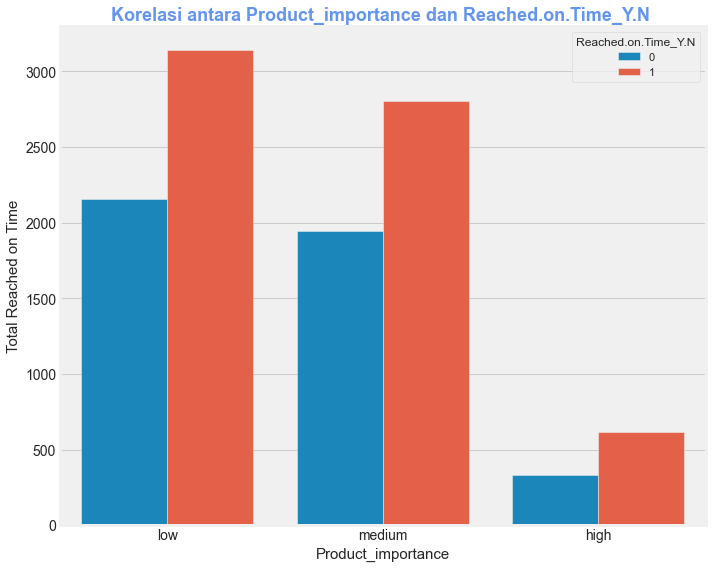

In [95]:
#Mengetahui hubungan/korelasi Product_importance terhadap Reached.on.Time_Y.N
plt.figure(figsize=(10,8))
sns.countplot(x='Product_importance', hue='Reached.on.Time_Y.N', data=data)

plt.title('Korelasi antara Product_importance dan Reached.on.Time_Y.N ',color='cornflowerblue',fontsize=18,fontweight='bold')
plt.ylabel('Total Reached on Time', fontsize=15) # y axis label
plt.xlabel('Product_importance', fontsize=15) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14);

plt.tight_layout()

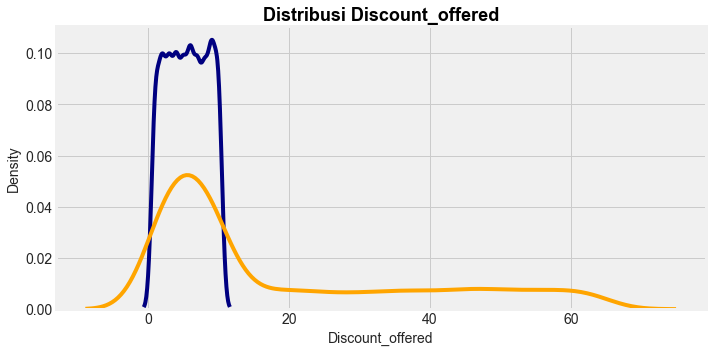

In [99]:
#mengetahui distirbusi Discount_offered 
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(data[data['Reached.on.Time_Y.N'] == 0]['Discount_offered'], color= 'navy', label= 'Late: No', ax=ax)
sns.kdeplot(data[data['Reached.on.Time_Y.N'] == 1]['Discount_offered'], color= 'orange', label= 'Late: Yes', ax=ax)

ax.set_title('Distribusi Discount_offered',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Discount_offered', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tight_layout()

<AxesSubplot:xlabel='Weight_in_gms', ylabel='Density'>

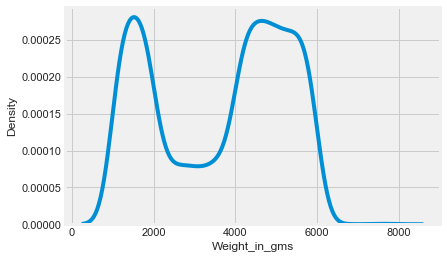

In [130]:
sns.kdeplot(data['Weight_in_gms'])

In [105]:
#Mengetahui hubungan/korelasi Weight_in_gms terhadap Reached.on.Time_Y.N
data['Weight_in_gms'].describe()

count    10999.000000
mean      3634.016729
std       1635.377251
min       1001.000000
25%       1839.500000
50%       4149.000000
75%       5050.000000
max       7846.000000
Name: Weight_in_gms, dtype: float64

In [131]:
def Berat(x):
  if x['Weight_in_gms'] < 4149:
    Segment= 'Ringan'
  else:
    Segment = 'Berat'
  return Segment

data['Berat'] = data.apply(lambda x: Berat(x), axis =1)
data.sample(15)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Berat
8543,8544,F,Ship,4,2,167,4,high,M,5,5250,0,Berat
5753,5754,F,Flight,3,4,239,8,high,M,4,4192,0,Berat
4943,4944,F,Flight,3,5,135,3,low,M,3,4938,0,Berat
3164,3165,A,Flight,4,4,225,5,low,M,5,5060,1,Berat
3052,3053,C,Ship,5,4,168,3,low,M,34,1779,1,Ringan
3326,3327,A,Ship,4,2,156,3,low,M,3,5923,0,Berat
9049,9050,F,Flight,3,4,238,2,low,M,5,4349,1,Berat
5440,5441,C,Ship,3,1,225,2,high,M,6,5274,1,Berat
4381,4382,F,Flight,3,1,224,2,low,M,9,4007,1,Ringan
453,454,B,Ship,4,1,275,10,medium,F,23,2726,1,Ringan


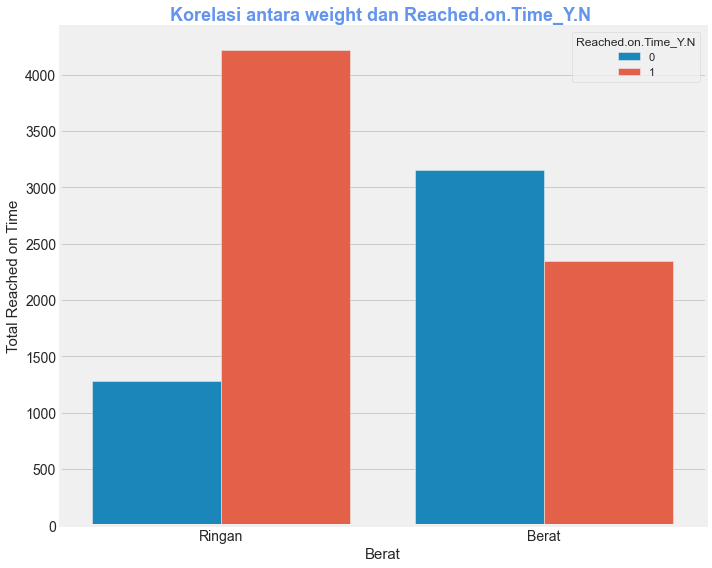

In [132]:
#Mengetahui hubungan/korelasi weight terhadap Reached.on.Time_Y.N
plt.figure(figsize=(10,8))
sns.countplot(x='Berat', hue='Reached.on.Time_Y.N', data=data)

plt.title('Korelasi antara weight dan Reached.on.Time_Y.N ',color='cornflowerblue',fontsize=18,fontweight='bold')
plt.ylabel('Total Reached on Time', fontsize=15) # y axis label
plt.xlabel('Berat', fontsize=15) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14);

plt.tight_layout()

###### Multivariate Analysis
Korelasi Feature dengan Target :<br>
1. ..

## Insight (20 Poin)

Apa saja insight yang kamu temukan dari hasil-hasil analisis di atas?

# Data Preparation

## Missing Value (5 Poin)

## Duplicate Values (5 Poin)

## Outliers (5 Poin)

## Normalization/Standardization (5 Poin)


## Feature encoding (5 Poin)

## Class imbalance (5 Poin)

# Conclusion (10 Poin)

Menurutmu, mana saja 3 pre-processing yang paling memberikan impact?